In [1]:
import sys
import os
import re

from pathlib import Path

In [2]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)

f:\Vital Stuff\Εργασίες Σχολείου\The dreadful present\Μαστερ\Μαστερ Εξάμηνο 2ο\Machine Learning in Computational Biology\Project\FinalProject\MLKinCompBioFinalProject


In [3]:
%load_ext autoreload
%autoreload 2

from functions import *

In [8]:
X_df=produce_df(hy_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_subset_10k_cells.h5ad",
                    th_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-TH-log2_subset_10k_cells.h5ad",
                    verbose=False)

my_file = Path("../data/merged_train_subset10k.csv")

if not my_file.is_file():
    X_df.to_csv("../data/merged_train_subset10k.csv",index=False)

test_df=produce_df(hy_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_subset_3k_cells.h5ad",
                    th_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-TH-log2_subset_3k_cells.h5ad",
                    verbose=False,test=True)

my_file = Path("../data/merged_test_subset3k.csv")

if not my_file.is_file():
    test_df.to_csv("../data/merged_test_subset3k.csv",index=False)


Index(['ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000067879',
       'ENSMUSG00000097893', 'ENSMUSG00000042501', 'ENSMUSG00000048960',
       'ENSMUSG00000101314', 'ENSMUSG00000067813', 'ENSMUSG00000067780',
       'ENSMUSG00000025776',
       ...
       'ENSMUSG00000041380', 'ENSMUSG00000015405', 'ENSMUSG00000031377',
       'ENSMUSG00000086008', 'ENSMUSG00000087340', 'ENSMUSG00000044583',
       'ENSMUSG00000031355', 'ENSMUSG00000072844', 'ENSMUSG00000103994',
       'ENSMUSG00000102045'],
      dtype='object', name='gene_identifier', length=2000)
Index(['ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000067879',
       'ENSMUSG00000097893', 'ENSMUSG00000048960', 'ENSMUSG00000099498',
       'ENSMUSG00000025932', 'ENSMUSG00000025927', 'ENSMUSG00000028033',
       'ENSMUSG00000026141',
       ...
       'ENSMUSG00000040522', 'ENSMUSG00000044583', 'ENSMUSG00000031355',
       'ENSMUSG00000072844', 'ENSMUSG00000069053', 'ENSMUSG00000096650',
       'ENSMUSG00000099601',

In [9]:
common_columns = X_df.columns.intersection(test_df.columns)

X_df=X_df[common_columns].copy()
print(X_df.shape)
test_df=test_df[common_columns].copy()
print(test_df.shape)

(20000, 1246)
(6000, 1246)


In [10]:

my_file = Path("../data/rncv_summary_results.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/merged_train_subset3k.csv')

The winner method is LightGBM with 9/9 metrics
 ALL HAIL THE KING!


<Axes: title={'center': 'Repeated nested CV metrics for 3k cell and top 2k genes'}, xlabel='Model'>

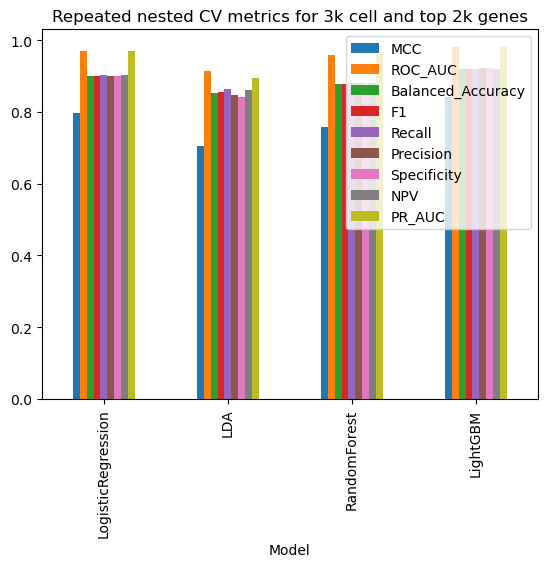

In [11]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_summary_results.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")


winner=get_winner(summary=results_df)

print(f"The winner method is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

results_df.plot(x='Model',kind='bar',stacked=False,title='Repeated nested CV metrics for 3k cell and top 2k genes')

[I 2025-06-23 20:35:13,051] A new study created in memory with name: Winner:RandomForest
[I 2025-06-23 20:36:07,403] Trial 0 finished with value: 0.8575500000000001 and parameters: {'n_estimators': 186, 'max_depth': 9, 'min_samples_split': 8}. Best is trial 0 with value: 0.8575500000000001.
[I 2025-06-23 20:37:28,124] Trial 1 finished with value: 0.865 and parameters: {'n_estimators': 251, 'max_depth': 10, 'min_samples_split': 7}. Best is trial 1 with value: 0.865.
[I 2025-06-23 20:39:17,196] Trial 2 finished with value: 0.8858499999999999 and parameters: {'n_estimators': 240, 'max_depth': 15, 'min_samples_split': 9}. Best is trial 2 with value: 0.8858499999999999.
[I 2025-06-23 20:41:31,226] Trial 3 finished with value: 0.88035 and parameters: {'n_estimators': 327, 'max_depth': 13, 'min_samples_split': 8}. Best is trial 2 with value: 0.8858499999999999.


For model RandomForest the best parameters are {'n_estimators': 240, 'max_depth': 15, 'min_samples_split': 9}
Bootstrapped 95% CIs (Model trained on dev, tested on val):
Balanced Accuracy: [0.8850, 0.9007]
F1 Score       : [0.8854, 0.9019]
Precision      : [0.8759, 0.8982]
Recall         : [0.8892, 0.9107]
MCC            : [0.7701, 0.8014]
ROC AUC        : [0.9608, 0.9687]
PR AUC         : [0.9621, 0.9704]
Specificity         : 0.8857
NPV                 : 0.8988


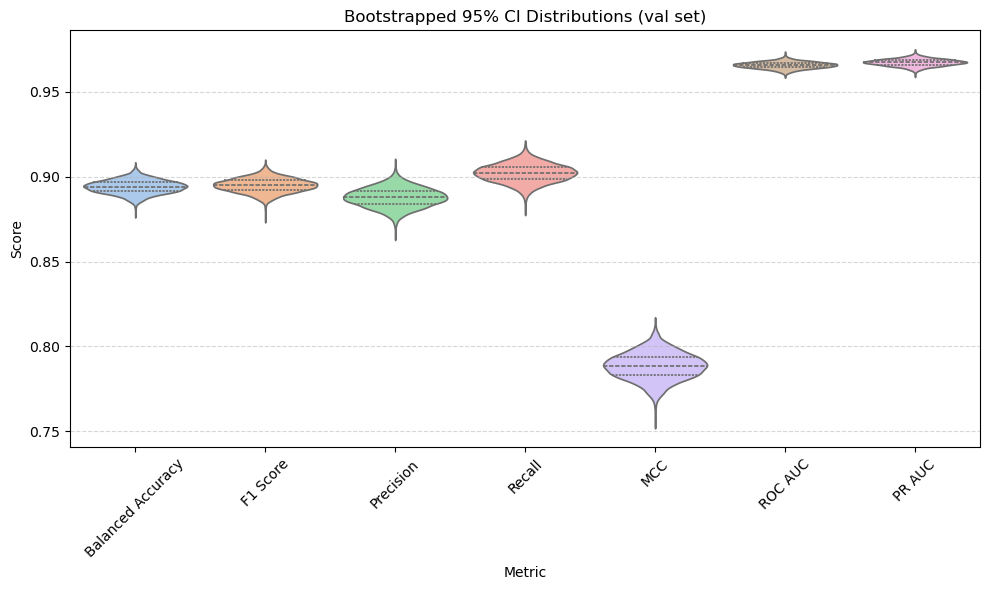

In [12]:
tuned_winner_dev=winner_tuning(df=X_df,winner='RandomForest')
bootstrap_model(df_dev=X_df,df_val=test_df,model=tuned_winner_dev)